# Introduciton to python - Basic Data Visualization

## TO DO
- sns.clustermap: 
    - add annotations of island
    - add axis and color scale labels

1. `seaborn` - quick data visualization
    - Categorical
    - Continuous
    - Categorical vs. continuous
    - Continuous vs. continuous
    - \>2 variables
    - "meta" plotting functions
2. `matplotlib` - full control of figures
    - reproduce a seaborn figure
3. Customize your plots
    - with `seaborn`
    - with `matplotlib`
4. Create and save your plot 

In python, there are two main packages used to visualize data: [`matplotlib`](https://matplotlib.org/) and [`seaborn`](https://seaborn.pydata.org/). 
Although `matplotlib` set the base in data visualization in Python, it becomes cumbersome to make quick plots. Hence, the `seaborn` library was born, as a wrapper of the latter adapted to make plotting simple and quick.

Their usage is so widespread that many packages depend on these to visualize data. Packages like `pandas`, rely on these libraries to make their visualizations.

In this session, we will use the [`palmerpenguins`](https://allisonhorst.github.io/palmerpenguins/articles/intro.html) dataset to workout how we can easily visualize data with these libraries and how they can be further leveraged to edit every bit of your plot.

In [2]:
# first, load the essential packages to read and wrangle tables
import pandas as pd
import numpy as np

In [5]:
# download and read the table from their online repository
data = pd.read_csv("data/penguins.csv")
data = data.dropna()
data

Unnamed: 0    species     island  bill_length_mm  bill_depth_mm  \
0             0     Adelie  Torgersen            39.1           18.7   
1             1     Adelie  Torgersen            39.5           17.4   
2             2     Adelie  Torgersen            40.3           18.0   
4             4     Adelie  Torgersen            36.7           19.3   
5             5     Adelie  Torgersen            39.3           20.6   
..          ...        ...        ...             ...            ...   
339         339  Chinstrap      Dream            55.8           19.8   
340         340  Chinstrap      Dream            43.5           18.1   
341         341  Chinstrap      Dream            49.6           18.2   
342         342  Chinstrap      Dream            50.8           19.0   
343         343  Chinstrap      Dream            50.2           18.7   

     flipper_length_mm  body_mass_g     sex  year  
0                181.0       3750.0    male  2007  
1                186.0       3800.0  female  2007  
2                195.0       3250.0  female  2007  
4                193.0       3450.0  female  2007  
5                190.0       3650.0    male  2007  
..                 ...          ...     ...   ...  
339              207.0       4000.0    male  2009  
340              202.0       3400.0  female  2009  
341              193.0       3775.0    male  2009  
342              210.0       4100.0    male  2009  
343              198.0       3775.0  female  2009  

[333 rows x 9 columns]

This dataset contains different types of information on these penguins. We can classify these into categorical or continuous types of data. Below you'll find a summary of what is contained in every variable

In [5]:
data.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000

## `seaborn` - quick data visualization

As mentioned above, `seaborn` was born as a `matplotlib` wrapper to facilitate data visualization from dataframes.

Now, we will explore some of the different functions that we can use to quickly explore the dataset by asking questions.

But first, as usual, we need to load the package:

In [6]:
import seaborn as sns

### Categorical - `countplot` and `barplot`

Categorical variables contain information on how we can group our observations into similar buckets or classes. For that, barplots are a great tool

**How many penguins of each species are there?**

**1. Use `sns.countplot` setting the 'data' and 'x' arguments.**

<AxesSubplot:xlabel='species', ylabel='count'>

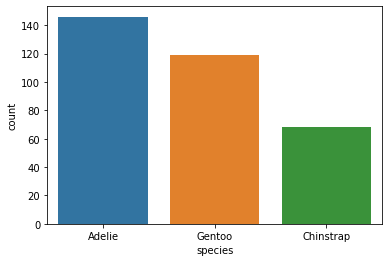

In [7]:
# try using sns.countplot using the parameters 'data' and 'x'
# to introduce the dataframe and the variable to plot counts from, respectively
sns.countplot(data=data, x="species")

**2. Save your plot into an object called 'g'.**

<AxesSubplot:xlabel='species', ylabel='count'>

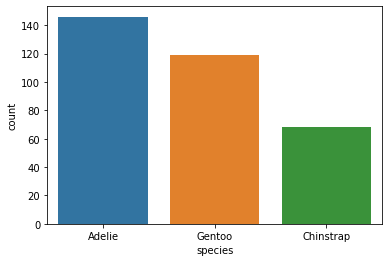

In [8]:
g = sns.countplot(data=data, x="species")
g

**3. Relabel the X and Y axes using the methods `.set_xlabel` and `.set_ylabel`**

Text(0, 0.5, 'Count')

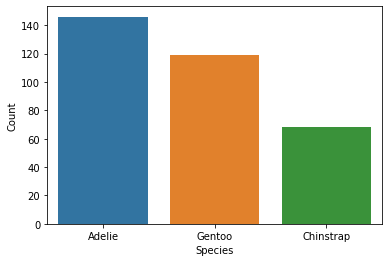

In [9]:
g = sns.countplot(data=data, x="species")
g.set_xlabel("Species")
g.set_ylabel("Count")

Note that we didn't need to provide the counts for each species to the function! That sped up the process! However, for the next visualizations we'll need to be more explicit... So, let's count the classes first.

**4. Switch to `sns.barplot` to visualize the number of penguins of each species.** First, you'll need to create a new dataframe counting the number of times each penguin species appears. Try to combine the `pandas.DataFrame` methods `.groupby`, `.size`, `reset_index`. Now, you'll have to define both axes variables to the ploting function.

Text(0, 0.5, 'Count')

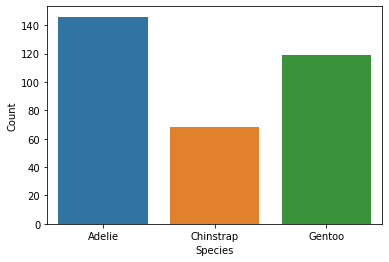

In [78]:
# alternatively, count the penguins for each species and plot
counts = data.groupby("species").size().reset_index(name="n")
g = sns.barplot(data=counts, x="species", y="n")
g.set_xlabel("Species")
g.set_ylabel("Count")

**How many penguins from each island and species are there?**

Note that colors and x-axis are redundant in the plot above. Maybe we can exploit that to visualize more information. The "hue" parameter allows you to further split the bar plot into the selected category. See how grouping our data makes our lifes simpler to ask more complicated questions.

Text(0, 0.5, 'Count')

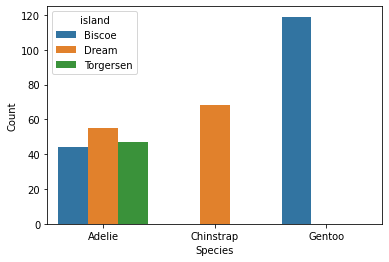

In [195]:
# try using the 'hue' parameter in sns.barplot
counts = data.groupby(["species","island"]).size().reset_index(name="n")
g = sns.barplot(data=counts, x="species", y="n", hue="island")
g.set_xlabel("Species")
g.set_ylabel("Count")

### Continuous - `histplot` and `kdeplot`

Continuous variables give us numerical information on the observations, providing us with a distribution of values for a certain feature, like penguins bill length.

**What is the distribution of bill lengths?**

Text(0.5, 0, 'Bill Length (mm)')

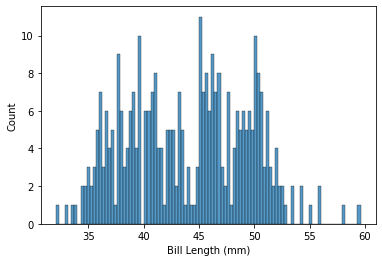

In [10]:
# the 'bins' parameter sets the number of bins to partition our countinuous variable
g = sns.histplot(data=data, x="bill_length_mm", bins=100)
g.set_xlabel("Bill Length (mm)")

**What is the distribution of bill lengths across species?**

Text(0.5, 0, 'Bill Length (mm)')

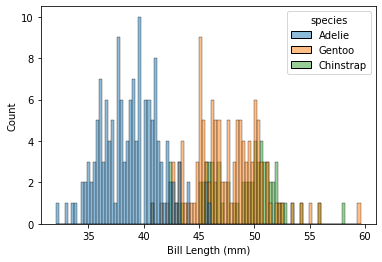

In [81]:
g = sns.histplot(data=data, x="bill_length_mm", hue="species", bins=100)
g.set_xlabel("Bill Length (mm)")

Text(0.5, 0, 'Bill Length (mm)')

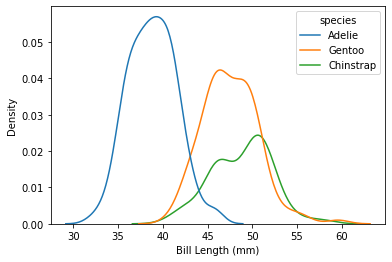

In [82]:
g = sns.kdeplot(data=data, x="bill_length_mm", hue="species")
g.set_xlabel("Bill Length (mm)")

### Categorical vs. Continuous - `boxplot`, `violinplot`,`stripplot`,`swarmplot`

We also find a series of plots for those moments when we need to know how continuous variables may differ between groups

**What are the distributions of bill length between sexes across species?**

Text(0, 0.5, 'Bill Length (mm)')

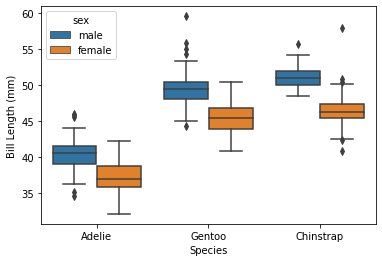

In [85]:
g = sns.boxplot(data=data, x="species", y="bill_length_mm", hue="sex")
g.set_xlabel("Species")
g.set_ylabel("Bill Length (mm)")

Now try using violin plots.

Text(0, 0.5, 'Bill Length (mm)')

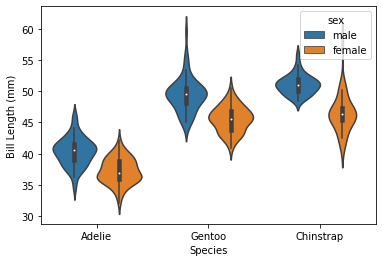

In [84]:
g = sns.violinplot(data=data, x="species", y="bill_length_mm", hue="sex")
g.set_xlabel("Species")
g.set_ylabel("Bill Length (mm)")

And strip plots, a.k.a. jitter plots.

Text(0, 0.5, 'Bill Length (mm)')

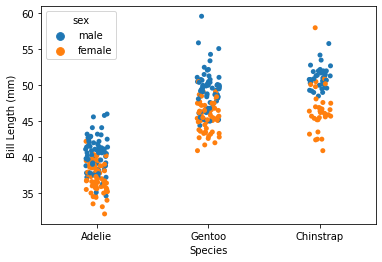

In [86]:
g = sns.stripplot(data=data, x="species", y="bill_length_mm", hue="sex")
g.set_xlabel("Species")
g.set_ylabel("Bill Length (mm)")

Or swarm plots.

Text(17.200000000000003, 0.5, 'Bill Length (mm)')

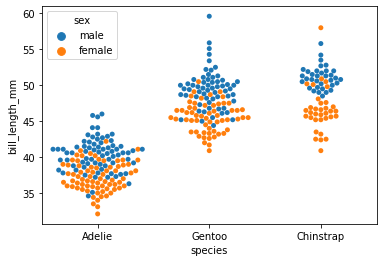

In [87]:
sns.swarmplot(data=data, x="species", y="bill_length_mm", hue="sex")
g.set_xlabel("Species")
g.set_ylabel("Bill Length (mm)")

### Continuous vs. Continuous - `scatterplot`, `kdeplot`, `jointplot`

Finally, sometimes we are interested in how two variables continuous variables covariate together.

**What is the relationship between bill length and body mass in penguins of different species?**

Text(0, 0.5, 'Bill Length (mm)')

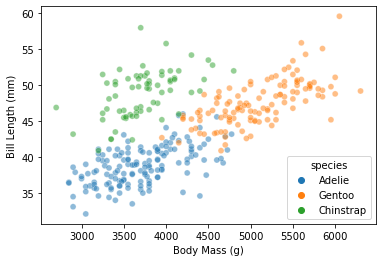

In [88]:
g = sns.scatterplot(data=data, x="body_mass_g", y="bill_length_mm", hue="species", alpha=0.5)
g.set_xlabel("Body Mass (g)")
g.set_ylabel("Bill Length (mm)")

Text(0, 0.5, 'Bill Length (mm)')

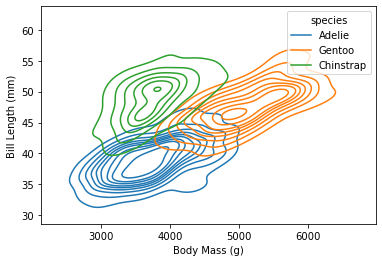

In [89]:
g = sns.kdeplot(data=data, x="body_mass_g", y="bill_length_mm", hue="species")
g.set_xlabel("Body Mass (g)")
g.set_ylabel("Bill Length (mm)")

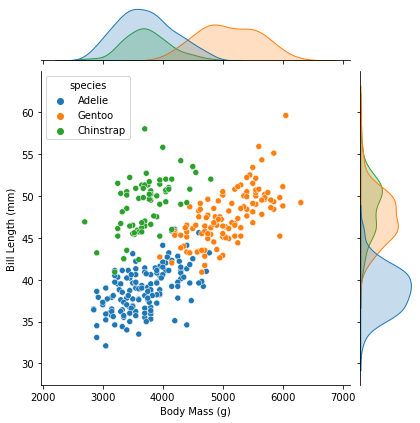

In [91]:
g = sns.jointplot(data=data, x="body_mass_g", y="bill_length_mm", hue="species")
g.set_axis_labels("Body Mass (g)", "Bill Length (mm)")

With `jointplot` we get three for the price of one!

### >2 variables

**What is the relationship between all continuous variables considering all penguin species?**

#### `pairplot`

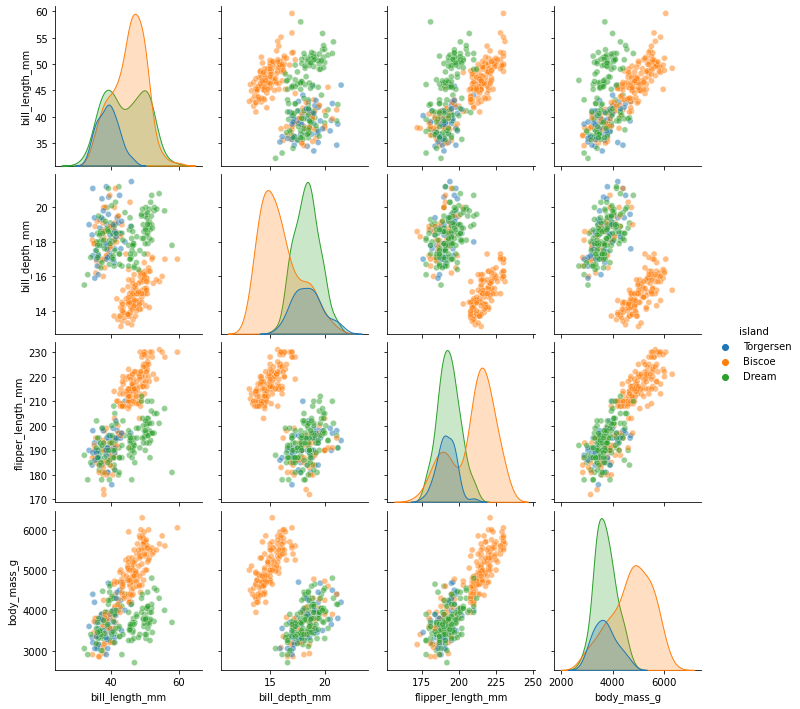

In [92]:
cols_oi = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","island"]
sns.pairplot(data=data[cols_oi], hue="island", plot_kws={"alpha":0.5})

#### `heatmap`

Text(33.0, 0.5, 'Observations')

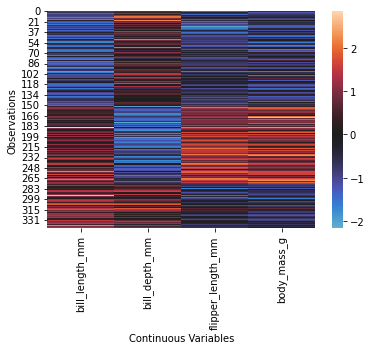

In [96]:
cols_oi = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
scaled = data[cols_oi].apply(lambda x: (x - x.mean())/x.std(), axis=0)
g = sns.heatmap(data=scaled, center=0)
g.set_xlabel("Continuous Variables")
g.set_ylabel("Observations")

#### `clustermap`

<bound method _BaseGrid.set of <seaborn.matrix.ClusterGrid object at 0x7f6cf7b59eb0>>

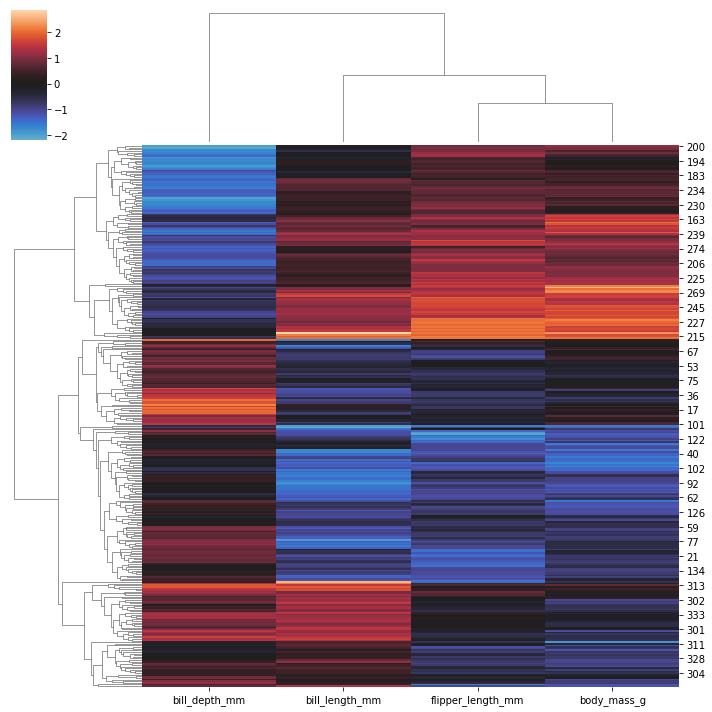

In [97]:
cols_oi = ["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]
scaled = data[cols_oi].apply(lambda x: (x - x.mean())/x.std(), axis=0)
g = sns.clustermap(data=scaled, center=0)

### "meta" plotting functions

#### `catplot`

**How many penguins from each island and species of each sex are there?**

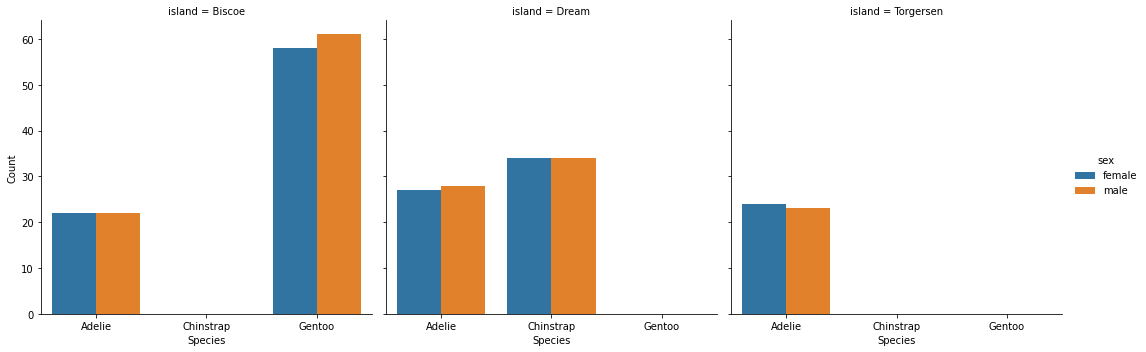

In [73]:
# try using the 'hue' and 'col_wrap' parameters in sns.catplot
counts = data.groupby(["species","island","sex"]).size().reset_index(name="n")
g = sns.catplot(data=counts, x="species", y="n", hue="sex", col="island", kind="bar")
g.set_axis_labels("Species", "Count")

#### `lineplot`

**What is the relationship between body mass and bill length across species and sexes?**

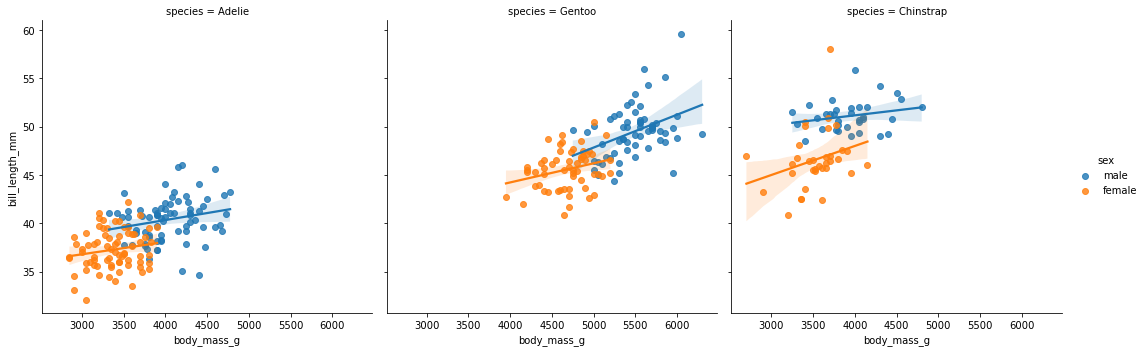

In [46]:
sns.lmplot(data=data, x="body_mass_g", y="bill_length_mm", hue="sex", col="species")

## `matplotlib` - full control of the plot

In [65]:
import matplotlib.pyplot as plt

### reproduce a `seaborn` figure

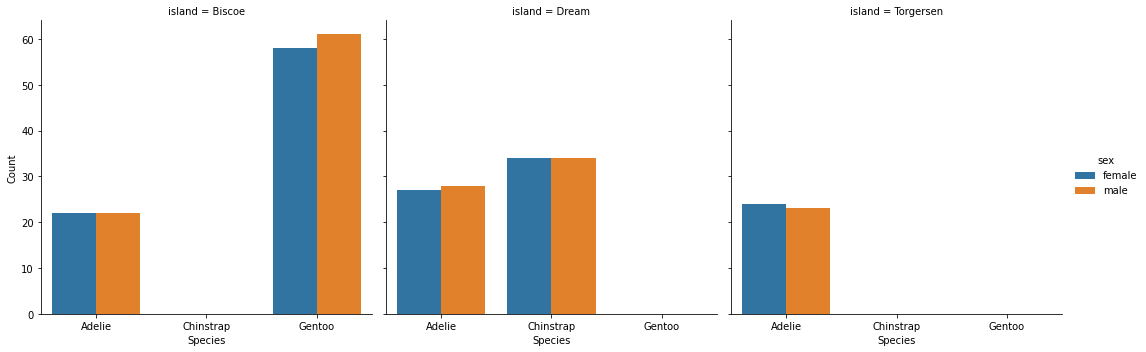

In [120]:
counts = data.groupby(["species","island","sex"]).size().reset_index(name="n")

g = sns.catplot(data=counts, x="species", y="n", hue="sex", col="island", kind="bar")
g.set_axis_labels("Species", "Count")

In [151]:
data = data.astype({"species":"category", "island":"category", "sex":"category"})
counts = data.groupby(["species","island","sex"]).size().reset_index(name="n")

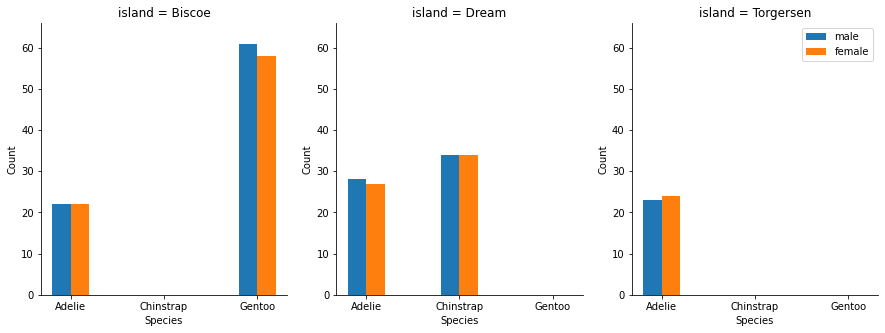

In [163]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

axs = axs.ravel()
islands = counts["island"].unique()

width=0.2

for ax, island in zip(axs, islands):
    # subset
    df = counts.loc[counts["island"]==island]
    x = np.arange(len(df.loc[df["sex"]=="male","species"]))
    xlabels = df.loc[df["sex"]=="male","species"].values
    
    # male
    ax.bar(x=x-0.5*width, 
           height=df.loc[df["sex"]=="male","n"], 
           label="male", width=width)
    # female
    ax.bar(x=x+0.5*width, 
           height=df.loc[df["sex"]=="female","n"], 
           label="female", width=width)
    
    ax.set_ylim(0, counts["n"].max()+5)
    ax.set_title("island = %s" % island)
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.set_xlabel("Species")
    ax.set_ylabel("Count")
    
ax.legend()
plt.show()

## Customize your plots

### `matplotlib`

In [185]:
import matplotlib.font_manager as font_manager

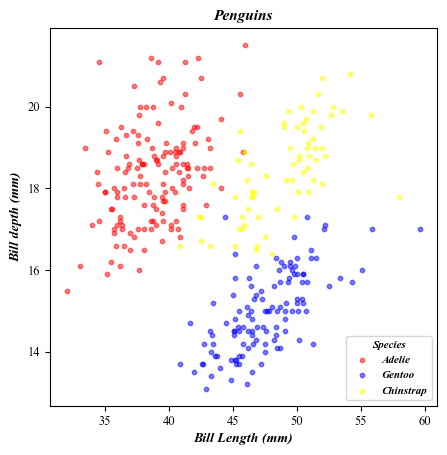

In [193]:
colors = {
    "Adelie": "red",
    "Gentoo": "blue",
    "Chinstrap": "yellow"
}

fontsize=11
fontname="Times New Roman"
fontface="bold"

fig = plt.figure(figsize=(5,5), dpi=100)

for specie in data["species"].unique():
    idx = data["species"]==specie
    x = data.loc[idx,"bill_length_mm"]
    y = data.loc[idx,"bill_depth_mm"]
    c = colors[specie]
    plt.scatter(x=x, y=y, c=c, s=10, alpha=0.5, label=specie)
    
plt.title("Penguins", fontname=fontname, fontsize=fontsize, weight=fontface, style="italic")
plt.xlabel("Bill Length (mm)", fontname=fontname, fontsize=fontsize-1, weight=fontface, style="italic")
plt.ylabel("Bill depth (mm)", fontname=fontname, fontsize=fontsize-1, weight=fontface, style="italic")
plt.xticks(fontname=fontname, fontsize=fontsize-2, weight="normal", style="normal")
plt.yticks(fontname=fontname, fontsize=fontsize-2, weight="normal", style="normal")

font = font_manager.FontProperties(family=fontname, weight="bold", style="italic", size=8)
plt.legend(title="Species", loc="lower right", prop=font, title_fontproperties=font)

plt.show()

### `seaborn`

<ipython-input-192-3af69df871cf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticks(), fontname=fontname, fontsize=fontsize-2, weight="normal", style="normal")
<ipython-input-192-3af69df871cf>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticks(), fontname=fontname, fontsize=fontsize-2, weight="normal", style="normal")


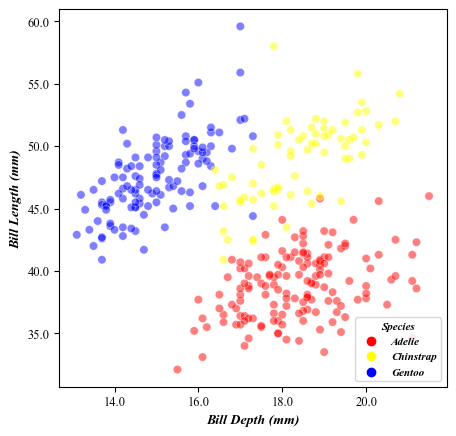

In [192]:
plt.figure(figsize=(5,5), dpi=100)
colors = {
    "Adelie": "red",
    "Gentoo": "blue",
    "Chinstrap": "yellow"
}

fontsize=11
fontname="Times New Roman"
fontface="bold"

g = sns.scatterplot(data=data, x="bill_depth_mm", y="bill_length_mm", 
                    hue="species", alpha=0.5, palette=colors)

g.set_xlabel("Bill Depth (mm)", fontname=fontname, fontsize=fontsize-1, weight=fontface, style="italic")
g.set_ylabel("Bill Length (mm)", fontname=fontname, fontsize=fontsize-1, weight=fontface, style="italic")
g.set_xticklabels(g.get_xticks(), fontname=fontname, fontsize=fontsize-2, weight="normal", style="normal")
g.set_yticklabels(g.get_yticks(), fontname=fontname, fontsize=fontsize-2, weight="normal", style="normal")

font = font_manager.FontProperties(family=fontname, weight="bold", style="italic", size=8)
plt.legend(title="Species", loc="lower right", prop=font, title_fontproperties=font)

plt.show()

## Create and save your plot

In [198]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, *, dpi='figure', format=None, metadata=None,
              bbox_inches=None, pad_inches=0.1,
              facecolor='auto', edgecolor='auto',
              backend=None, **kwargs
             )
    
    The available output formats depend on the backend being used.
    
    Parameters
    ----------
    fname : str or path-like or binary file-like
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is set, it determines the output format, and the file
        is saved as *fname*.  Note that *fname* is used verbatim, and there
        is no attempt to make the extension, if any, of *fname* match
        *format*, and no extension is appended.
    
        If *format* is not set, then the format is inf

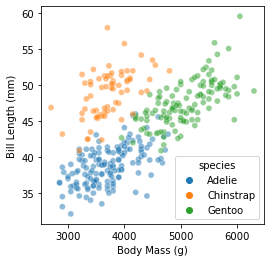

In [202]:
# set your figure size
plt.figure(figsize=(4,4))
# place your plot here
g = sns.scatterplot(data=data, x="body_mass_g", y="bill_length_mm", hue="species", alpha=0.5)
g.set_xlabel("Body Mass (g)")
g.set_ylabel("Bill Length (mm)")
# save
plt.savefig("myfigure.png", dpi=300)
# show
plt.show()

![](myfigure.png)